<a href="https://colab.research.google.com/github/Netoperek5000/colab-cifar10/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu May 16 07:50:51 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [43]:
import numpy as np
import matplotlib.pyplot as plt
!pip install imgaug
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import random
from sklearn.model_selection import train_test_split

In [0]:
X = np.load('X.npy')
y = np.load('y.npy')

In [6]:
print(X.shape)

(17817, 60, 80, 3)


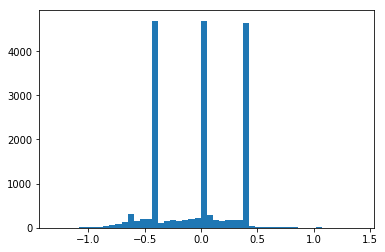

In [8]:
plt.hist(y, 50);

0.0


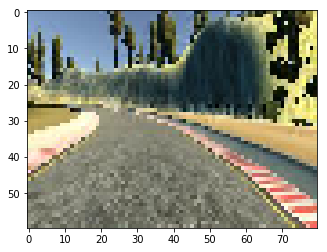

-0.47500000000000003


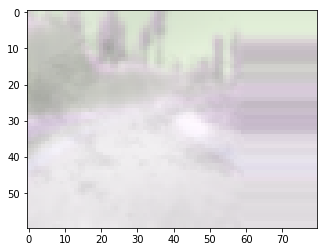

In [42]:
def augment(img, steering_angle):
  # Flip
  if random.random() >0.5:
    img = img[:, ::-1, :]
    steering_angle = steering_angle
  # Blur
  blurer = iaa.GaussianBlur(iap.Uniform(0.1, 1.0))
  img = blurer.augment_image(img)
  # Shuffle
  sh = iaa.ChannelShuffle(p=0.5)
  img = sh.augment_image(img)
  # Fog
  fog = iaa.Fog()
  img = fog.augment_image(img)
  # Translate
  tx = random.randint(-20,20)
  translater = iaa.Affine(translate_px={"x":tx}, mode='edge')
  img = translater.augment_image(img)
  steering_angle += tx*0.025 
  return img, steering_angle

plt.imshow(X[0])
print(y[0])
plt.show();

img, angle = augment(X[0], y[0])
plt.imshow(img)
print(angle)
plt.show();

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state=42)

In [49]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(14253, 60, 80, 3) (14253,)
(3564, 60, 80, 3) (3564,)


In [58]:
Xgen=[]
ygen=[]
for i in range(X_train.shape[0]):
  img,angle = augment(X[i],y[i])
  Xgen.append(img)
  ygen.append(angle)
  
Xgen = np.array(Xgen)
ygen = np.array(ygen)
print(Xgen.shape, ygen.shape)

  

(14253, 60, 80, 3) (14253,)


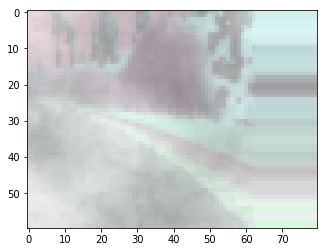

In [59]:
plt.imshow(Xgen[0])

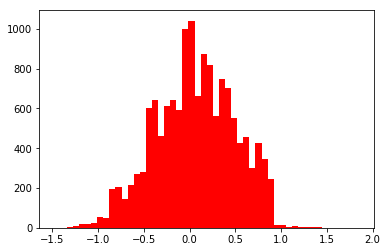

In [61]:
#plt.hist(y_train, 50, facecolor='green');
plt.hist(ygen, 50, facecolor='red');